In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  
import unicodedata

import os
import glob

In [11]:
raw_data_path = os.path.join('data', 'raw')
all_files = glob.glob(raw_data_path +"/prov_top_songs_with_lyrics.csv")
lyrics_df = pd.concat(pd.read_csv(f) for f in all_files)
#tweets_df = pd.read_csv('data/raw/top_songs_with_lyrics.csv', encoding = 'latin1')
lyrics_df.head(20)
columnLyric='lyric'

In [12]:
lyrics_df = lyrics_df[lyrics_df[columnLyric].isnull()==False]
lyrics_df.head(10)

,N°,artists,explicit,genre,lyric,musixmatch_rating,rank,title,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs,clase,Observacion
1,2,"SECH, DADDY YANKEE, J BALVIN FEATURING ROSALIA...",1.0,NaN,"Ahora todo cambió, le toca a ella\nLatino gang...",90.0,2,RELACION,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN
3,4,OZUNA,0.0,Latin / Pop in Spanish,"Woh-oh-oh-oh (Dime, ma')\nBaby, baby\nOzuna\n\...",79.0,4,CARAMELO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,NaN
5,6,KAROL G,0.0,NaN,"Ovy On The Drums\nYa no te estaba buscando, ba...",80.0,6,"AY, DIOS MIO!",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
6,7,BLACK EYED PEAS X J BALVIN,1.0,Latin / Pop in Spanish,"This is the rhythm, rhythm, rhythm, rhythm\nTh...",82.0,8,RITMO (BAD BOYS FOR LIFE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
7,8,TAINY X J BALVIN,0.0,Music,(SpongeBob SquarePants)\n(SpongeBob SquarePant...,80.0,9,AGUA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
8,9,"OZUNA, DOJA CAT & SIA",1.0,NaN,Ah-ah-ah-oh-oh-oh\nAh-ah-ah-oh-oh\nYeah-eh\nAh...,81.0,10,DEL MAR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
9,10,"BLACK EYED PEAS, OZUNA + J.REY SOUL",1.0,NaN,"Baby, ven conmigo (ven conmigo)\nBaila (baila)...",26.0,11,MAMACITA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,NaN
10,11,LOS DOS CARNALES,0.0,Music,"Pocas amistades, a la más sincera la llevo en ...",74.0,12,EL ENVIDIOSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
13,14,ROSALIA & TRAVIS SCOTT,1.0,Music,"Cosa' de familia, no la' tienen que escucha'\n...",81.0,15,TKN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
14,15,FARRUKO,1.0,NaN,A ella ya no le motiva salir\nQuedó traumada\n...,30.0,16,LA TOXICA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN


PREPROCESING

In [13]:
!pip3 install es_core_news_md
#!python -m spacy download es_core_news_md
!python -m spacy download es_core_news_sm
#import spacy
#nlp = spacy.load('es_core_news_md')

[+] Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [14]:
import re
import string

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')

import es_core_news_sm

nlp = es_core_news_sm.load()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leow_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leow_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import spacy

#import es_core_news_md
#nlp = es_core_news_md.load()
import es_core_news_sm
nlp = es_core_news_sm.load()
doc = nlp("""Eres tú la droga de mi cuerpo
Y dejarte ya no puedo
Porque eres de mi sangre
Una gran necesidad
Que no puedo calmar
Aunque seas prohibida en sociedad
conquistándo 
escribió
describirte
perrear""")
for token in doc: print(token.text, "|", token.lemma_, '|', token.pos_)
    
#aux= re.sub(r'me$', '', 'conquistandome')


Eres | Eres | PROPN
tú | tú | PRON
la | lo | DET
droga | drogar | NOUN
de | de | ADP
mi | mi | DET
cuerpo | cuerpo | NOUN

 | 
 | SPACE
Y | Y | CCONJ
dejarte | dejarte | NOUN
ya | ya | ADV
no | no | ADV
puedo | poder | VERB

 | 
 | SPACE
Porque | Porque | SCONJ
eres | ser | AUX
de | de | ADP
mi | mi | DET
sangre | sangrar | NOUN

 | 
 | SPACE
Una | Una | DET
gran | gran | ADJ
necesidad | necesidad | NOUN

 | 
 | SPACE
Que | Que | SCONJ
no | no | ADV
puedo | poder | AUX
calmar | calmar | VERB

 | 
 | SPACE
Aunque | Aunque | SCONJ
seas | ser | NOUN
prohibida | prohibir | ADJ
en | en | ADP
sociedad | sociedad | NOUN

 | 
 | SPACE
conquistándo | conquistándo | VERB

 | 
 | SPACE
escribió | escribir | VERB

 | 
 | SPACE
describirte | describirte | NOUN

 | 
 | SPACE
perrear | perrear | ADJ


In [16]:
## Agregar Lematizacion o Stemming 
## Agregar remover acentos 
## completar lista de stop words 

def lemmatize(lyric):
    tk = nlp(lyric)
    tk_lemmatize = ""
    for word in tk:
        tk_lemmatize = tk_lemmatize +" "+word.lemma_
    return tk_lemmatize
    

def token_clean_stopwords(message):
    stop_words = stopwords.words('spanish') + stopwords.words('english')
    more_stopwords = ['rhythm','ovy','ay','hey','woh','si', 'pa', 'sé', 'solo', 'yeah', 'yeh', 'oh', 'i', 'to', 'va', 'the', 'aunque', 'you', 'eh', 'cómo','ma']
    total_stopwords = stop_words + more_stopwords
    text_token_stopwords = [word for word in message.split() if ((word.lower() not in total_stopwords) and (len(word)>4))]
    #    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('spanish')]


    return text_token_stopwords

def remove_puntuation(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join = remove_accents(Test_punc_removed_join)
    return Test_punc_removed_join

def remove_accents(input_str):
    """
    remueve acentos, aunque al ser un texto en inglés no deberían existir acentos
    """
    nfkd_form = unicodedata.normalize('NFKD', input_str )
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

def clean_str_puntuaction(input_df):
    input_df=input_df.replace("'","")
    input_df=input_df.replace("\r"," ")
    input_df=input_df.replace("\n"," ")
    input_df=input_df.replace("-"," ")
    input_df= re.sub("[\(\[].*?[\)\]]", "", input_df)
    input_df= re.sub(r'[^\w\s]', '', input_df)
    input_df= re.sub(r'me ', ' ', input_df)
    input_df= re.sub(r'te ', ' ', input_df)
    #input_df= remove_accents(input_df)
    return input_df

def clean_lyric(input_lyric):
    input_lyric = clean_str_puntuaction(input_lyric)
    #input_lyric = remove_puntuation(input_lyric)
    input_lyric = lemmatize(input_lyric)
    input_lyric = remove_accents(input_lyric)
    input_lyric = lemmatize(input_lyric)
    
    input_lyric = token_clean_stopwords(input_lyric)
    
    
    return input_lyric
    
    

# Solo ejecutar para el EDA

In [17]:
#Solo ejecutar para el EDA
eda_lyrics_df = lyrics_df
columnLyric='lyric'
df=lyrics_df[columnLyric].str.lower()
for i, j in df.items():
    df[i]=clean_lyric(j)
eda_lyrics_df[columnLyric]=df
eda_lyrics_df.head(10)
#print(type(eda_lyrics_df))
#print(type(df))

#eda_lyrics_df.info()


,N°,artists,explicit,genre,lyric,musixmatch_rating,rank,title,Violencia verbal,Violencia Física,Violencia Psicológica,Violencia Sexual,VIolencia Económica,Violencia Simbólica,Apto para niñxs,clase,Observacion
1,2,"SECH, DADDY YANKEE, J BALVIN FEATURING ROSALIA...",1.0,NaN,"[ahora, cambiar, tocar, latinar, perreando, so...",90.0,2,RELACION,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,NaN
3,4,OZUNA,0.0,Latin / Pop in Spanish,"[ozuna, poder, tener, curiosidad, pretender, q...",79.0,4,CARAMELO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,NaN
5,6,KAROL G,0.0,NaN,"[drums, buscar, coincidir, beber, coser, conqu...",80.0,6,"AY, DIOS MIO!",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
6,7,BLACK EYED PEAS X J BALVIN,1.0,Latin / Pop in Spanish,"[night, noche, rompemo, volvemo, saber, hacemo...",82.0,8,RITMO (BAD BOYS FOR LIFE),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
7,8,TAINY X J BALVIN,0.0,Music,"[party, debajo, aguar, buscar, paragua, bailar...",80.0,9,AGUA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
8,9,"OZUNA, DOJA CAT & SIA",1.0,NaN,"[ozuna, perder, arenar, tarar, sonar, tropical...",81.0,10,DEL MAR,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
9,10,"BLACK EYED PEAS, OZUNA + J.REY SOUL",1.0,NaN,"[conmigo, bailar, musicar, testigo, mamacita, ...",26.0,11,MAMACITA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,NaN
10,11,LOS DOS CARNALES,0.0,Music,"[amistar, sincerar, llevar, listar, amigar, ay...",74.0,12,EL ENVIDIOSO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
13,14,ROSALIA & TRAVIS SCOTT,1.0,Music,"[coser, familia, tener, escuchar, capar, capar...",81.0,15,TKN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,NaN
14,15,FARRUKO,1.0,NaN,"[motivar, salir, quedar, traumada, todavia, pe...",30.0,16,LA TOXICA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,NaN


In [18]:
eda_lyrics_df[columnLyric][5]

['drums',
 'buscar',
 'coincidir',
 'beber',
 'coser',
 'conquistar',
 'notar',
 'querer',
 'tambien',
 'entrar',
 'botella',
 'calentar',
 'escribir',
 'decir',
 'gustar',
 'cancion',
 'decir',
 'luego',
 'decir',
 'gustar',
 'conmigo',
 'querer',
 'tener',
 'relacionar',
 'decir']

In [14]:
eda_lyrics_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 1 to 555
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   N°                     412 non-null    int64  
 1   artists                412 non-null    object 
 2   explicit               412 non-null    float64
 3   genre                  246 non-null    object 
 4   lyric                  412 non-null    object 
 5   musixmatch_rating      412 non-null    float64
 6   rank                   412 non-null    int64  
 7   title                  412 non-null    object 
 8   Violencia verbal       412 non-null    float64
 9   Violencia Física       412 non-null    float64
 10  Violencia Psicológica  410 non-null    float64
 11  Violencia Sexual       411 non-null    float64
 12  VIolencia Económica    411 non-null    float64
 13  Violencia Simbólica    410 non-null    float64
 14  Apto para niñxs        411 non-null    float64
 15  clase 

In [15]:
eda_lyrics_df = eda_lyrics_df[eda_lyrics_df['lyric'].isnull()==False]
eda_lyrics_df = eda_lyrics_df[eda_lyrics_df['clase'].isnull()== False]
eda_lyrics_df = eda_lyrics_df[['lyric','clase']]
eda_lyrics_df.head()


,lyric,clase
1,"[ahora, cambiar, tocar, latinar, perreando, so...",1
3,"[ozuna, poder, tener, curiosidad, pretender, q...",1
5,"[drums, buscar, coincidir, beber, coser, conqu...",0
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0
7,"[party, debajo, aguar, buscar, paragua, bailar...",0


array([[<AxesSubplot:title={'center':'clase'}>]], dtype=object)

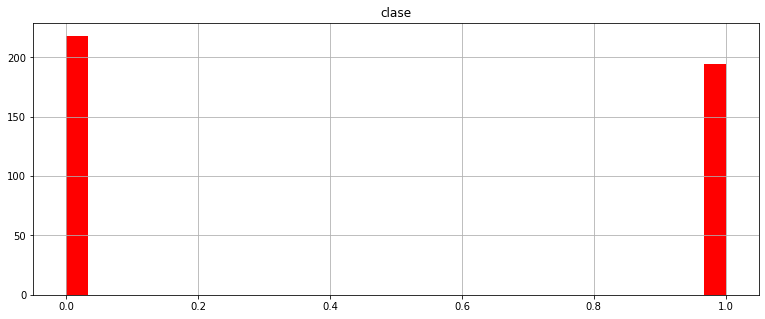

In [16]:
eda_lyrics_df.hist(bins = 30, figsize = (13,5), color = 'r')

<AxesSubplot:xlabel='clase', ylabel='count'>

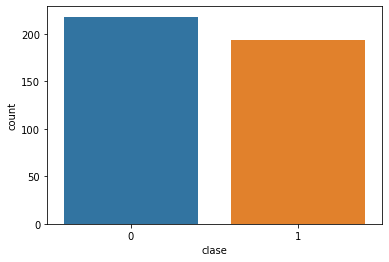

In [17]:
sns.countplot(eda_lyrics_df['clase'], label = 'Count')

In [18]:
eda_lyrics_df['length'] = eda_lyrics_df['lyric'].apply(len)
eda_lyrics_df

,lyric,clase,length
1,"[ahora, cambiar, tocar, latinar, perreando, so...",1,72
3,"[ozuna, poder, tener, curiosidad, pretender, q...",1,58
5,"[drums, buscar, coincidir, beber, coser, conqu...",0,25
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0,47
7,"[party, debajo, aguar, buscar, paragua, bailar...",0,39
...,...,...,...
548,"[tener, control, acceso, corazon, querer, habl...",1,35
550,"[fortuna, nadar, desafiar, destinar, frente, i...",1,32
551,"[manuel, turizo, querer, mientras, poder, roda...",1,44
552,"[color, desperto, interes, tener, ganar, verte...",1,26


<AxesSubplot:ylabel='Frequency'>

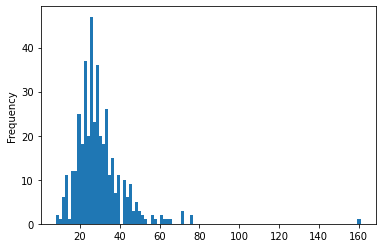

In [19]:
eda_lyrics_df['length'].plot(bins=100, kind='hist') 

In [20]:
eda_lyrics_df.describe()

,clase,length
count,412.000000,412.000000
mean,0.470874,29.565534
std,0.499758,12.624391
min,0.000000,8.000000
25%,0.000000,22.750000
50%,0.000000,27.000000
75%,1.000000,34.000000
max,1.000000,161.000000


In [22]:
eda_lyrics_df[eda_lyrics_df['length'] == 72]['lyric'].iloc[0]

['ahora',
 'cambiar',
 'tocar',
 'latinar',
 'perreando',
 'solita',
 'bonito',
 'ahora',
 'felicidad',
 'comer',
 'quito',
 'siempre',
 'dolor',
 'matar',
 'necesitar',
 'sonreia',
 'mientra',
 'enrolar',
 'decir',
 'falto',
 'actitud',
 'relacion',
 'hacer',
 'mandar',
 'decir',
 'ahora',
 'cambiar',
 'tocar',
 'botella',
 'gracia',
 'maltratar',
 'poner',
 'bello',
 'ahora',
 'querer',
 'querer',
 'ahora',
 'cambiar',
 'tocar',
 'party',
 'botella',
 'gracia',
 'maltratar',
 'poner',
 'bello',
 'ahora',
 'querer',
 'querer',
 'ahora',
 'querer',
 'grabar',
 'vacilar',
 'ensenar',
 'gustar',
 'seguir',
 'patrone',
 'patrón',
 'princecita',
 'buscate',
 'fiona',
 'finar',
 'semana',
 'party',
 'party',
 'seguir',
 'matar',
 'ganar',
 'botella',
 'dejar',
 'decir',
 'seguir',
 'tirar']

In [23]:
positive = eda_lyrics_df[eda_lyrics_df['clase']==0]
positive

,lyric,clase,length
5,"[drums, buscar, coincidir, beber, coser, conqu...",0,25
6,"[night, noche, rompemo, volvemo, saber, hacemo...",0,47
7,"[party, debajo, aguar, buscar, paragua, bailar...",0,39
10,"[amistad, sincero, llevar, listo, amigo, ayuda...",0,34
13,"[coser, familia, tener, escuchar, capar, capar...",0,38
...,...,...,...
431,"[soltar, selecto, grupo, bueno, parir, sufrir,...",0,26
440,"[sentir, poder, desesperar, sentir, haber, pen...",0,17
441,"[poder, despertarte, mananas, recorrer, contig...",0,19
444,"[decidete, saber, ofrecer, sushi, caminar, con...",0,23


In [24]:
negative = eda_lyrics_df[eda_lyrics_df['clase']==1]
negative

,lyric,clase,length
1,"[ahora, cambiar, tocar, latinar, perreando, so...",1,72
3,"[ozuna, poder, tener, curiosidad, pretender, q...",1,58
8,"[ozuna, perder, arenar, tarar, sonar, tropical...",1,35
9,"[conmigo, bailar, musicar, testigo, mamacita, ...",1,49
14,"[motivo, salir, quedar, traumada, todavia, pen...",1,56
...,...,...,...
548,"[tener, control, acceso, corazon, querer, habl...",1,35
550,"[fortuna, nadar, desafiar, destinar, frente, i...",1,32
551,"[manuel, turizo, querer, mientras, poder, roda...",1,44
552,"[color, desperto, interes, tener, ganar, verte...",1,26


In [25]:
lyric = eda_lyrics_df['lyric']
sentences_as_one_string = ""
for word in lyric:
    sentences_as_one_string =sentences_as_one_string+" ".join(word)


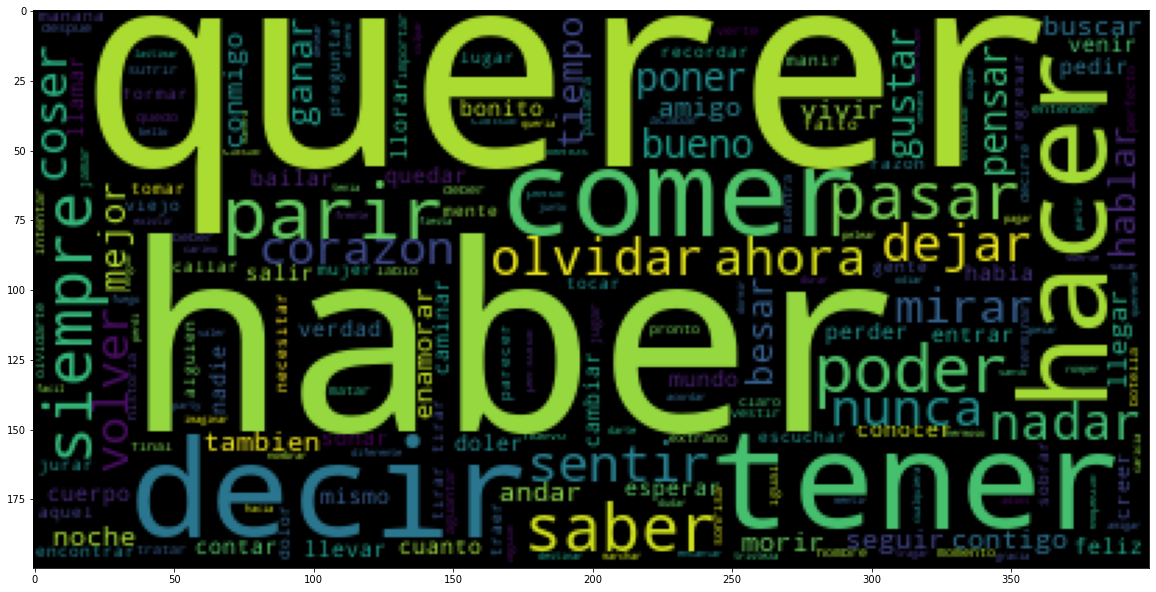

In [26]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

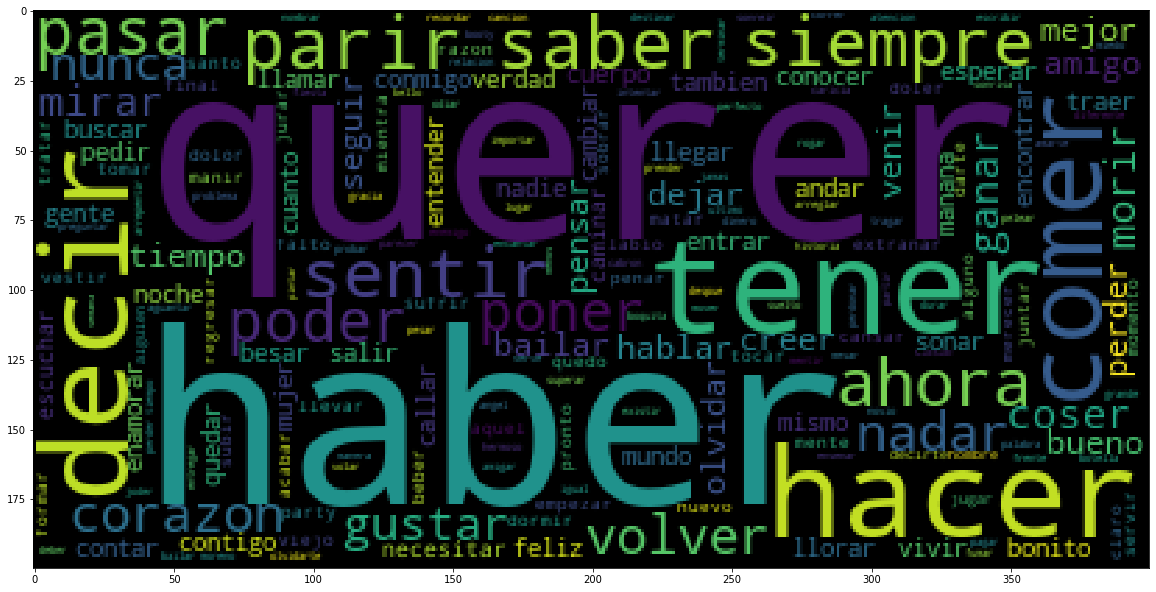

In [395]:
#negative_list = negative['lyric'].tolist()
#negative_sentences_as_one_string = " ".join(negative_list)
lyric = negative['lyric']
negative_sentences_as_one_string = ""
for word in lyric:
    negative_sentences_as_one_string =negative_sentences_as_one_string+" ".join(word)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

In [ ]:
#tweets_df_clean = tweets_df['lyric'].apply(message_cleaning)

# Vectorizar texto sin preprocesar

In [404]:
# Texto sin preprocesar
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = clean_lyric)
lyrics_countvectorizer = vectorizer.fit_transform(lyrics_df['lyric'])

In [405]:
print(vectorizer.get_feature_names())

['Abranle', 'Abusa', 'Aceptalo', 'Aclaremos', 'Acompaname', 'Acordando', 'Acostumbrado', 'Acostumbrandome', 'Acura', 'Adentro', 'Adida', 'Admitelo', 'Adoro', 'Afortunado', 'Agradecido', 'Agradezco', 'Aguantate', 'Ahora', 'Alann', 'Alaska', 'Alguien', 'Algun', 'Amenaza', 'Amigos', 'Amistades', 'Analizando', 'Andamo', 'Andando', 'Angeles', 'Animate', 'Anitta', 'Anoche', 'Anton', 'Aparentemente', 'Apenas', 'Aplicamos', 'Apoco', 'Aposte', 'Aprendi', 'Aprendimos', 'Apuesto', 'Aquel', 'Aquella', 'Aquellas', 'Aquellos', 'Arcangel', 'Arriba', 'Arturo', 'Aullando', 'Avanzan', 'Aviso', 'Azules', 'BUSCO', 'Baila', 'Bailamos', 'Bailando', 'Bajale', 'Balvin', 'Barquillero', 'Batalle', 'Beach', 'Bebecita', 'Beber', 'Bebiendo', 'Bella', 'Benji', 'Besando', 'Bienvenidos', 'Blanca', 'Bloods', 'Bohemia', 'Brasil', 'Bravo', 'Brinca', 'Burlesco', 'Busca', 'Buscaras', 'CUATRO', 'Cabron', 'Cachetes', 'California', 'Callaita', 'Callao', 'Callate', 'Cambio', 'Caminando', 'Camine', 'Caminen', 'Camino', 'Canelo

In [406]:
print(lyrics_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Ejecutar desde aquí 

In [407]:

lyrics = pd.DataFrame(lyrics_countvectorizer.toarray())

lyrics.reset_index(drop=True, inplace=True)


In [408]:
X = lyrics

In [409]:
X.shape


(412, 3035)

In [410]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [411]:

y=lyrics_df['clase']


In [412]:
y.shape

(412,)

In [413]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Probar distintos Algoritmos

# Naive Bayes

In [414]:


from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [415]:
from sklearn.metrics import classification_report, confusion_matrix

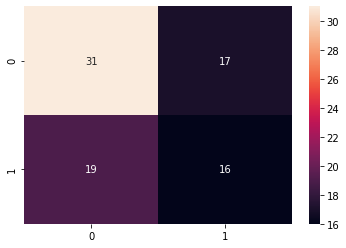

In [416]:
# Cambiar nombre del clasificador
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [417]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        48
           1       0.48      0.46      0.47        35

    accuracy                           0.57        83
   macro avg       0.55      0.55      0.55        83
weighted avg       0.56      0.57      0.56        83



# Random Forest

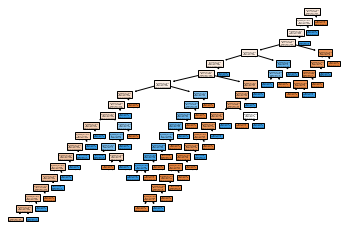

In [418]:
import matplotlib as matplot
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

rndmf = RandomForestClassifier(max_depth= 20, random_state= 0)
rndmf= rndmf.fit(X_train, y_train)

tree.plot_tree(rndmf.estimators_[9],
               filled = True)
plt.show()

In [419]:
from sklearn.metrics import classification_report, confusion_matrix

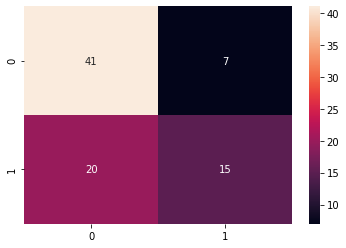

In [420]:
y_predict_test = rndmf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [421]:
print(classification_report(y_test, y_predict_test))


              precision    recall  f1-score   support

           0       0.67      0.85      0.75        48
           1       0.68      0.43      0.53        35

    accuracy                           0.67        83
   macro avg       0.68      0.64      0.64        83
weighted avg       0.68      0.67      0.66        83



# Decision Tree 

In [422]:
# Poner algoritmo aqui
from sklearn import tree


tree = tree.DecisionTreeClassifier()
tree = tree.fit(X_train, y_train)

#tree.plot_tree(tree, filled= True)
#plt.show()


In [423]:
from sklearn.metrics import classification_report, confusion_matrix

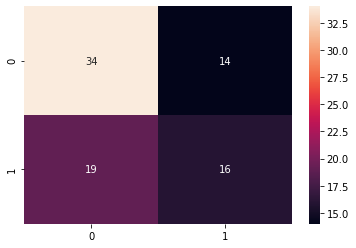

In [424]:
y_predict_test = tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [425]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67        48
           1       0.53      0.46      0.49        35

    accuracy                           0.60        83
   macro avg       0.59      0.58      0.58        83
weighted avg       0.60      0.60      0.60        83



In [426]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=200, random_state=0, n_estimators=200)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [427]:
from sklearn.metrics import classification_report, confusion_matrix

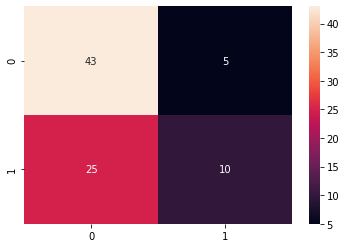

In [428]:
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [429]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.63      0.90      0.74        48
           1       0.67      0.29      0.40        35

    accuracy                           0.64        83
   macro avg       0.65      0.59      0.57        83
weighted avg       0.65      0.64      0.60        83

